In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express  as px 

In [ ]:
data=pd.read_excel('/content/Credit-Card-Defaulter-Prediction.xlsx')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


#Exploratory Data Analysis

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [ ]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y
29999,30000,50000,M,University,Married,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [ ]:
data.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
data.dtypes

ID            int64
LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
dtype: object

In [ ]:
data.shape

(30000, 25)

In [ ]:
data.rename(columns={'PAY_0':'Payment Status For September','PAY_2':'Payment Status For August','PAY_3':'Payment Status For May','PAY_4':'Payment Status For July','PAY_5':'Payment Status For June','PAY_6':'Payment Status For April'},inplace=True)

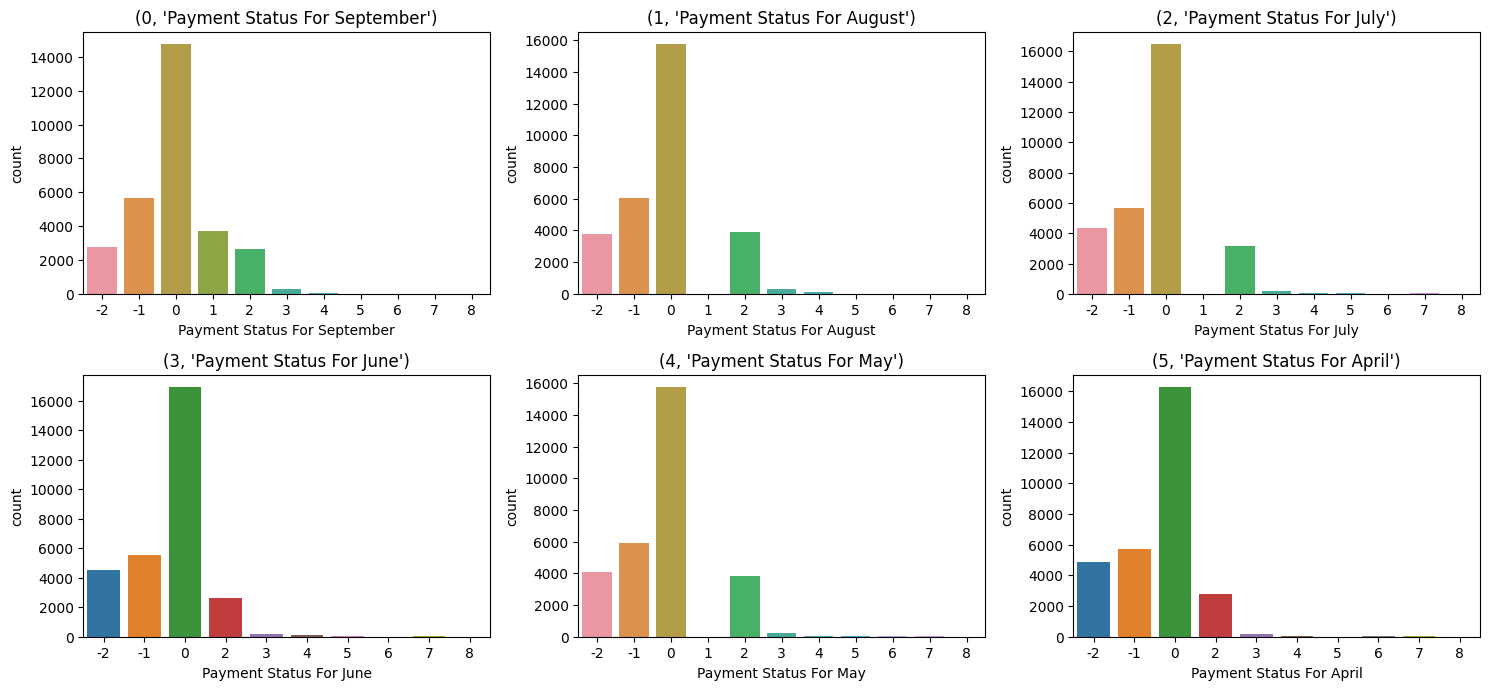

In [ ]:
categorical_columns = ['Payment Status For September','Payment Status For August','Payment Status For July','Payment Status For June','Payment Status For May','Payment Status For April']
plt.figure(figsize=(15,10))
for i in enumerate(categorical_columns):
  plt.subplot(3,3,i[0]+1)
  plt.title(i)
  sns.countplot(data=data,x=i[1])
plt.tight_layout()

In [ ]:
data.rename(columns={'BILL_AMT1': 'Amount of bill statement in September','BILL_AMT2': 'Amount of bill statement in August','BILL_AMT3': 'Amount of bill statement in July','BILL_AMT4': 'Amount of bill statement in June','BILL_AMT5': 'Amount of bill statement in May','BILL_AMT6': 'Amount of bill statement in April'},inplace=True)

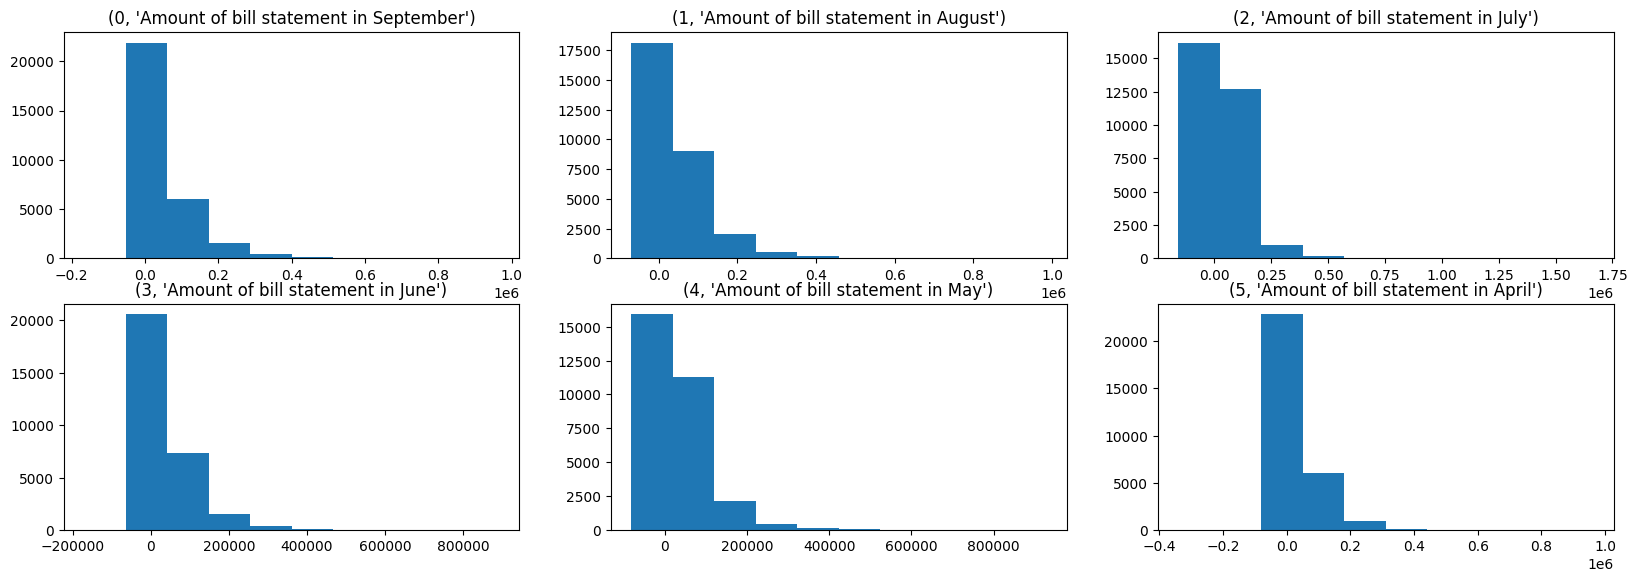

In [ ]:
num_cols=['Amount of bill statement in September','Amount of bill statement in August', 'Amount of bill statement in July', 'Amount of bill statement in June', 'Amount of bill statement in May', 'Amount of bill statement in April']
plt.figure(figsize=(20,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    plt.title(i)
    plt.hist(data[i[1]])
plt.show()

In [ ]:
df1 = data[data['default ']=='Y']

<Axes: xlabel='SEX', ylabel='count'>

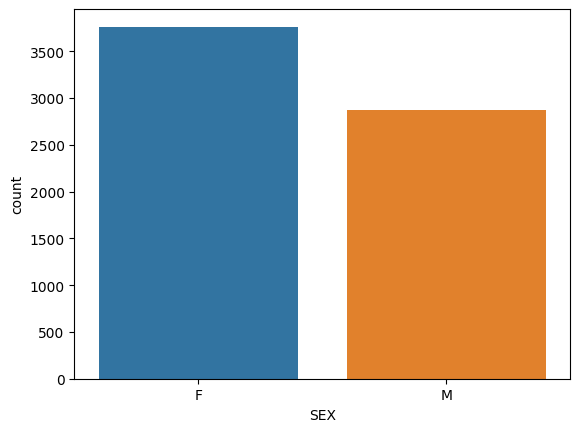

In [ ]:
sns.countplot(data=df1, x=df1['SEX'] )

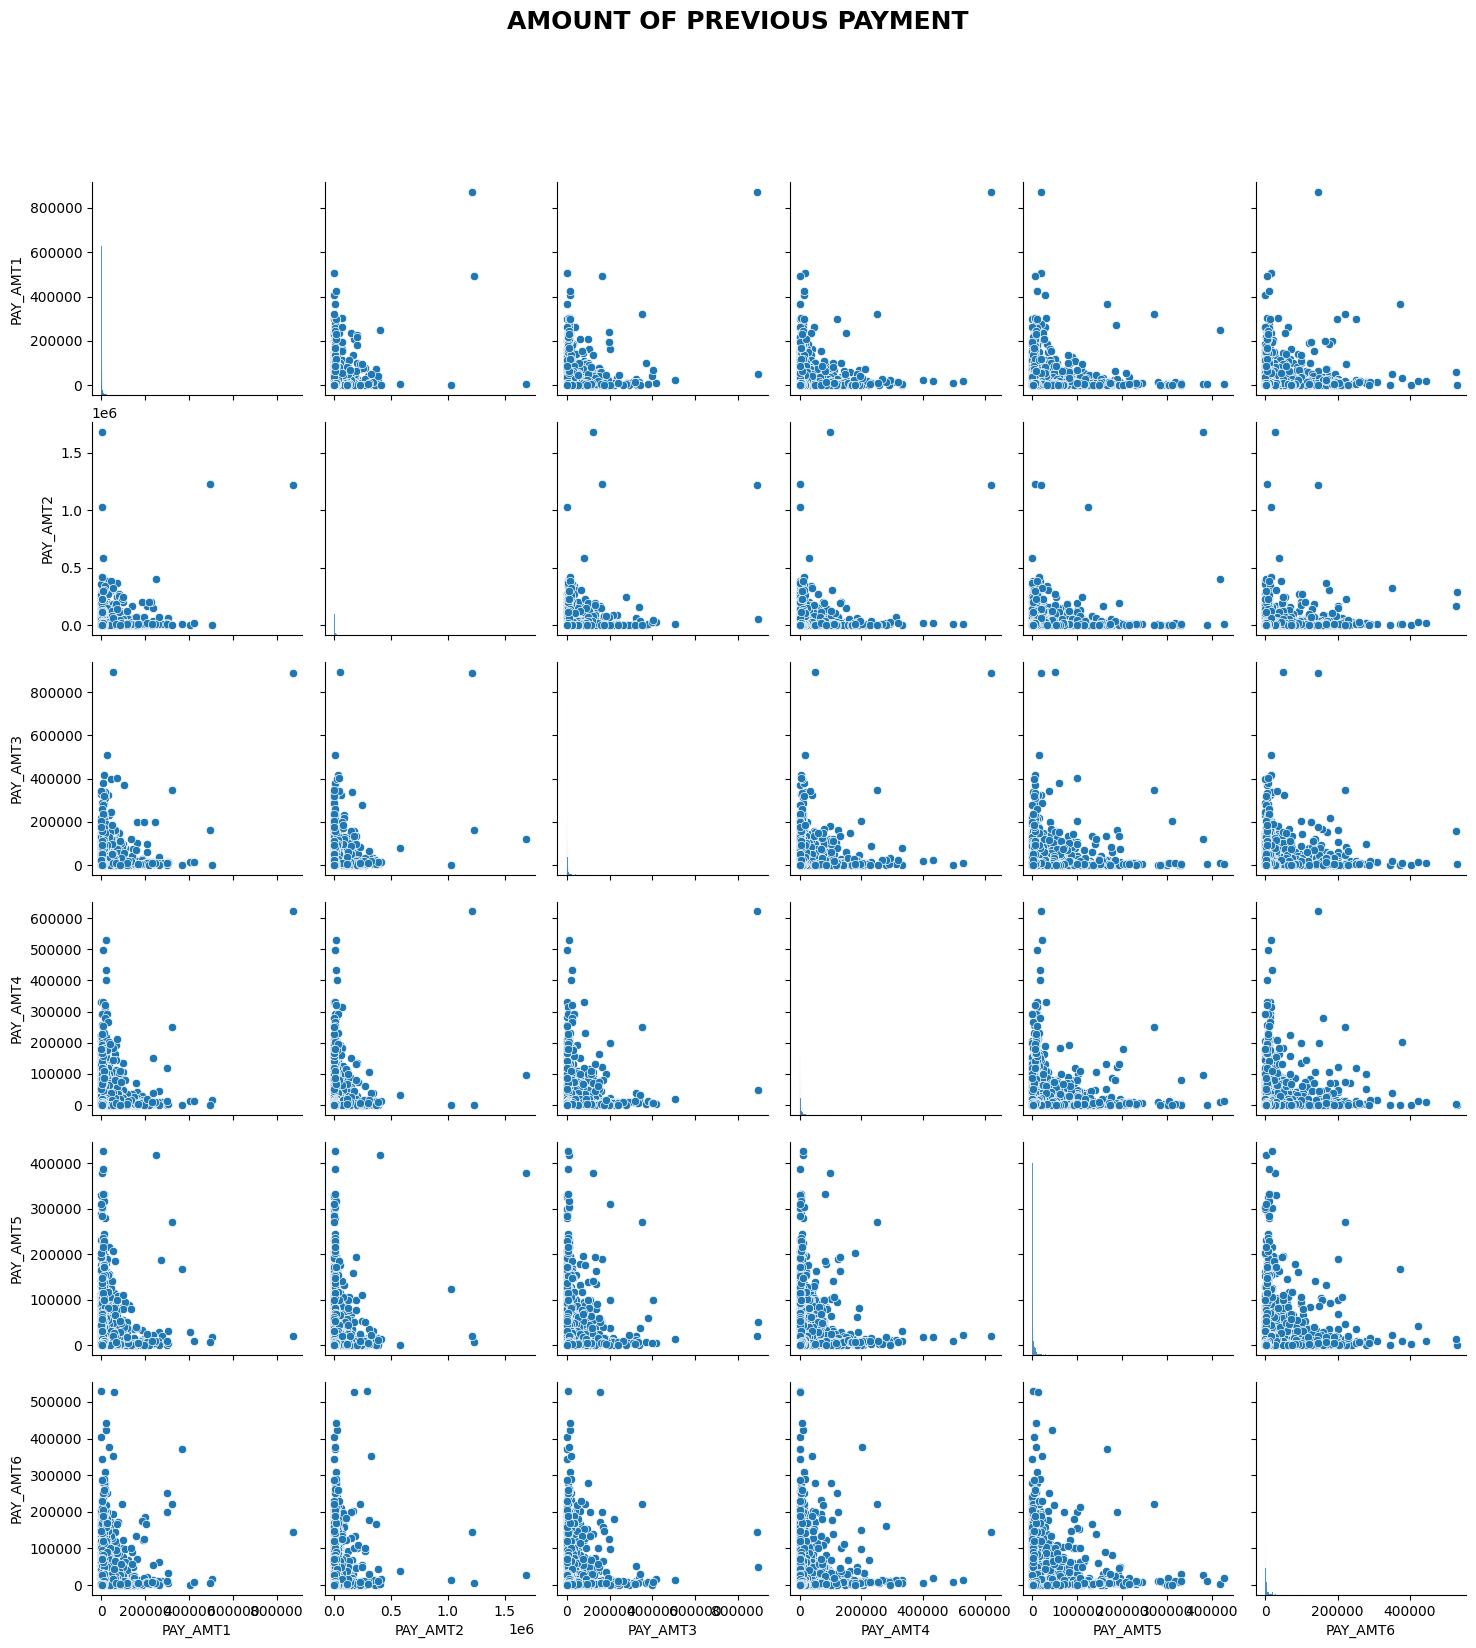

In [ ]:
slice_data = data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
sns.pairplot(slice_data).fig.suptitle('AMOUNT OF PREVIOUS PAYMENT',weight='bold',y=1.1).set_fontsize('18')
plt.show()

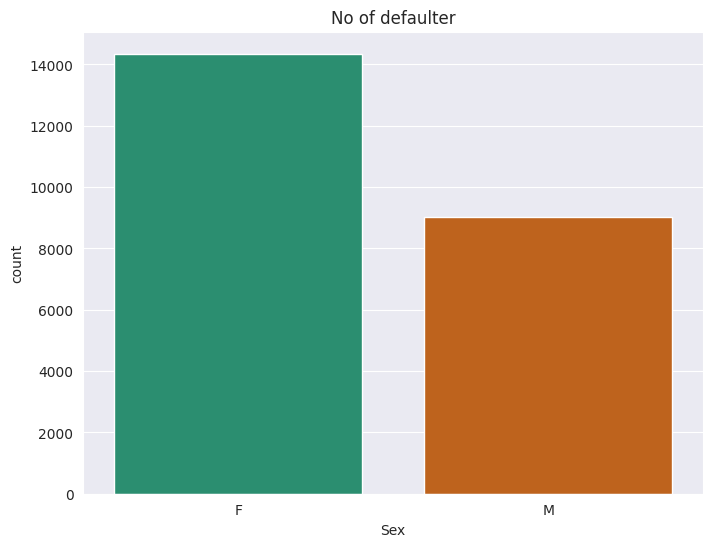

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))
df1 = data[data['default '] == 'N']
sns.countplot(data = df1, x = 'SEX', palette = 'Dark2')
plt.xlabel('Sex')
plt.title('No of defaulter');

In [ ]:
data.loc[data['EDUCATION'] == 'Others', 'EDUCATION'] = 'Unknown'
data.loc[data['EDUCATION'] == '0', 'EDUCATION'] = 'Unknown'
df2= data['EDUCATION'].value_counts().reset_index()
df2.columns = ['Education', 'No of people']
fig3 = px.pie(df2, values = 'No of people', names = 'Education',color_discrete_sequence =  px.colors.sequential.Plasma,
             title = 'Education qualification of credit card holder')

fig3.show()

<Axes: xlabel='default ', ylabel='count'>

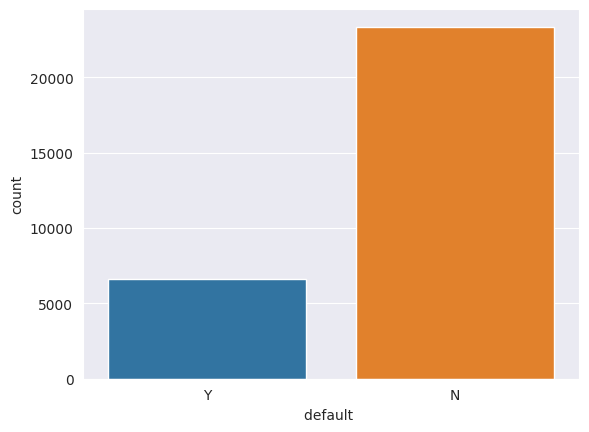

In [ ]:
sns.countplot(data=data, x=data['default '] )

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'University'),
  Text(1, 0, 'Graduate school'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Others'),
  Text(5, 0, '0')])

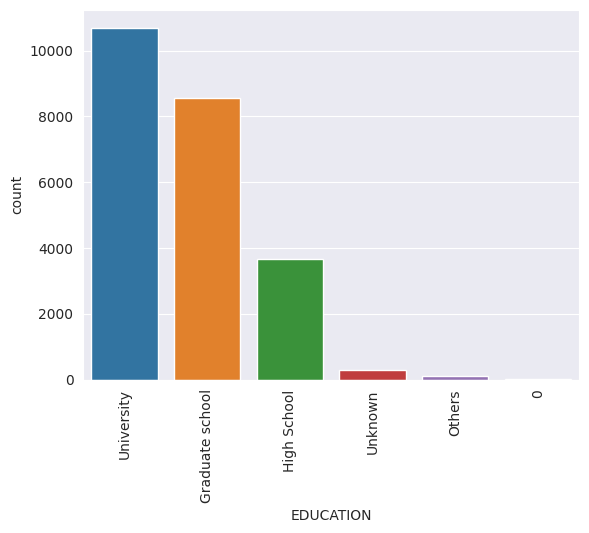

In [ ]:
sns.countplot(data=df1, x=df1['EDUCATION'] )
plt.xticks(rotation=90)





#Data Preprocessing

In [ ]:
data.shape

(30000, 25)

In [ ]:
#Finding Missing Values
data.isna().sum()

ID                                       0
LIMIT_BAL                                0
SEX                                      0
EDUCATION                                0
MARRIAGE                                 0
AGE                                      0
Payment Status For September             0
Payment Status For August                0
Payment Status For May                   0
Payment Status For July                  0
Payment Status For June                  0
Payment Status For April                 0
Amount of bill statement in September    0
Amount of bill statement in August       0
Amount of bill statement in July         0
Amount of bill statement in June         0
Amount of bill statement in May          0
Amount of bill statement in April        0
PAY_AMT1                                 0
PAY_AMT2                                 0
PAY_AMT3                                 0
PAY_AMT4                                 0
PAY_AMT5                                 0
PAY_AMT6   

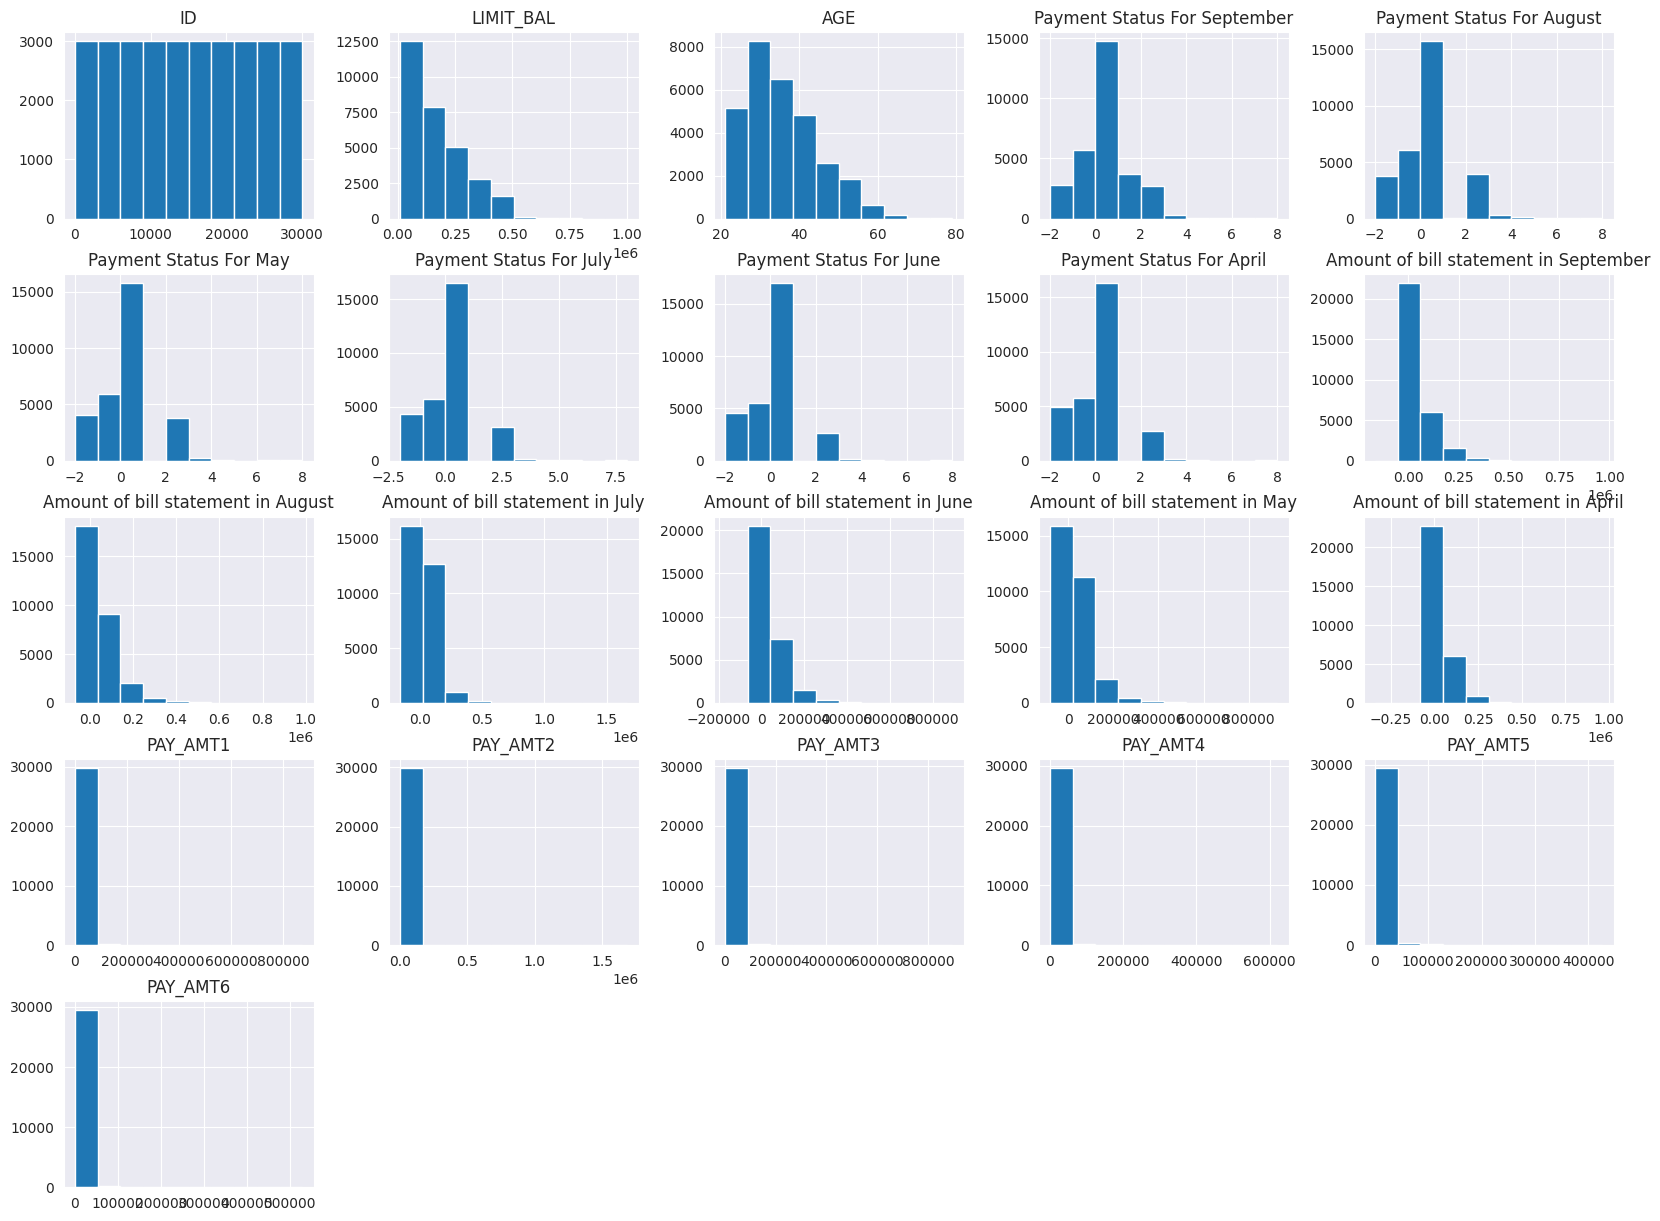

In [ ]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data['ID'].nunique()

30000

In [ ]:
data['MARRIAGE'].nunique()

4

In [ ]:
data['EDUCATION'].nunique()

5

In [ ]:
data.drop('ID',axis=1,inplace=True)

In [ ]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'Payment Status For September', 'Payment Status For August',
       'Payment Status For May', 'Payment Status For July',
       'Payment Status For June', 'Payment Status For April',
       'Amount of bill statement in September',
       'Amount of bill statement in August',
       'Amount of bill statement in July', 'Amount of bill statement in June',
       'Amount of bill statement in May', 'Amount of bill statement in April',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default '],
      dtype='object')

In [ ]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Payment Status For September,Payment Status For August,Payment Status For May,Payment Status For July,Payment Status For June,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Y
1,120000,F,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,90000,F,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,50000,F,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,50000,M,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [ ]:
data.shape

(30000, 24)

In [ ]:
data.dtypes

LIMIT_BAL                                 int64
SEX                                      object
EDUCATION                                object
MARRIAGE                                 object
AGE                                       int64
Payment Status For September              int64
Payment Status For August                 int64
Payment Status For May                    int64
Payment Status For July                   int64
Payment Status For June                   int64
Payment Status For April                  int64
Amount of bill statement in September     int64
Amount of bill statement in August        int64
Amount of bill statement in July          int64
Amount of bill statement in June          int64
Amount of bill statement in May           int64
Amount of bill statement in April         int64
PAY_AMT1                                  int64
PAY_AMT2                                  int64
PAY_AMT3                                  int64
PAY_AMT4                                

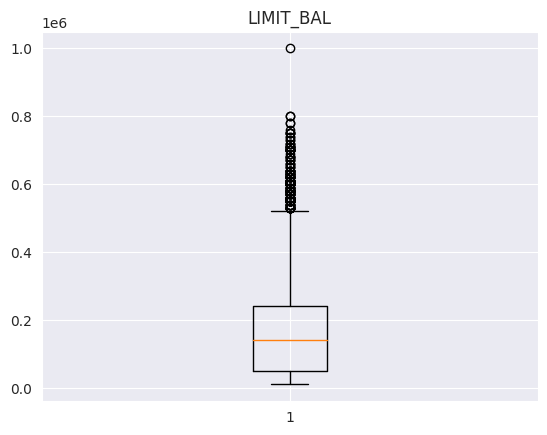

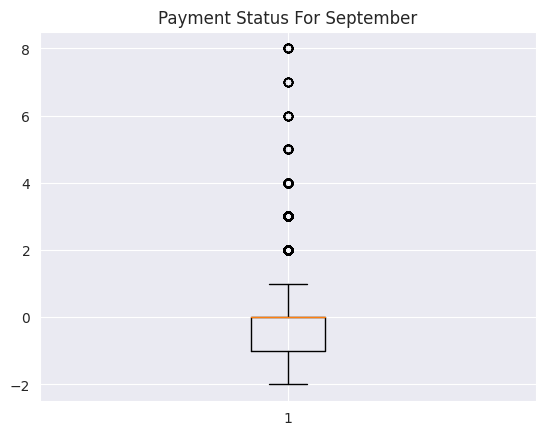

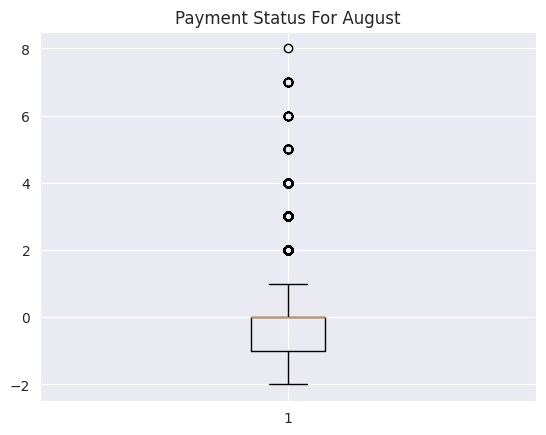

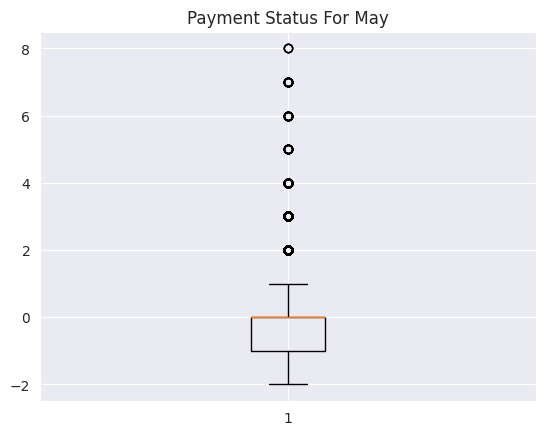

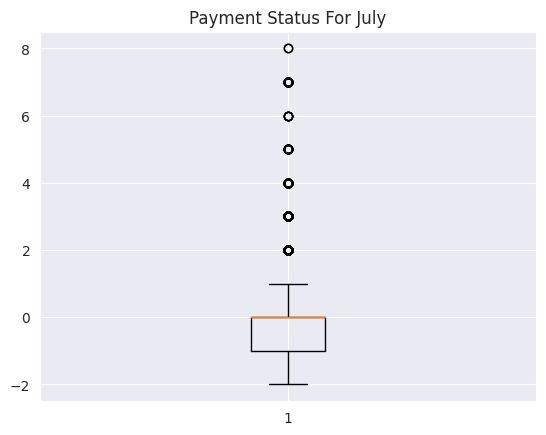

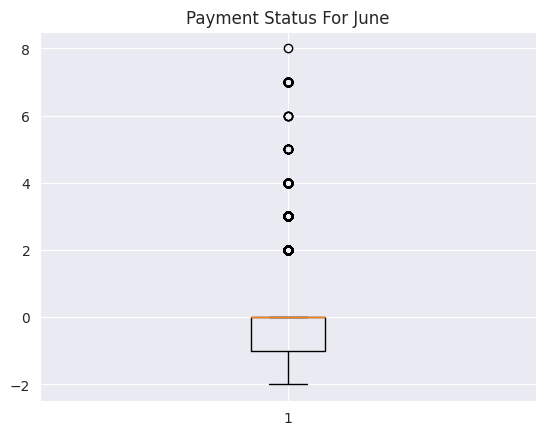

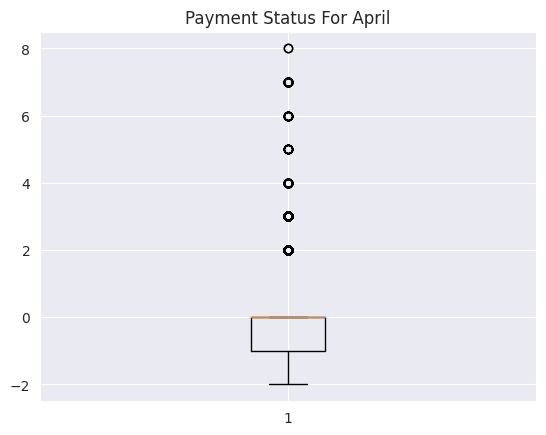

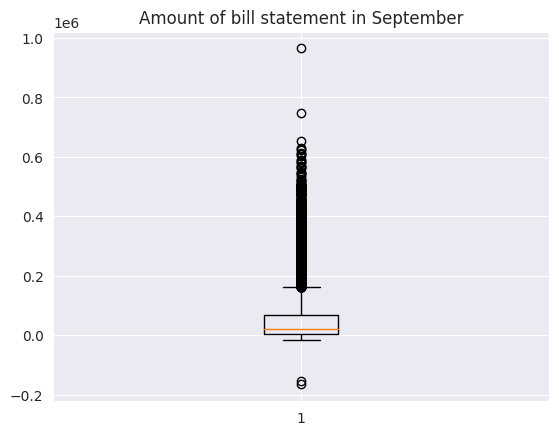

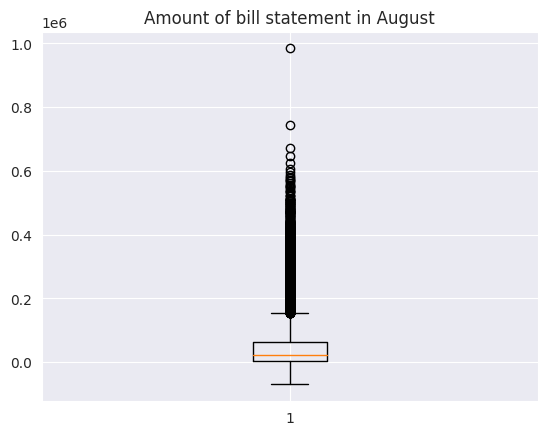

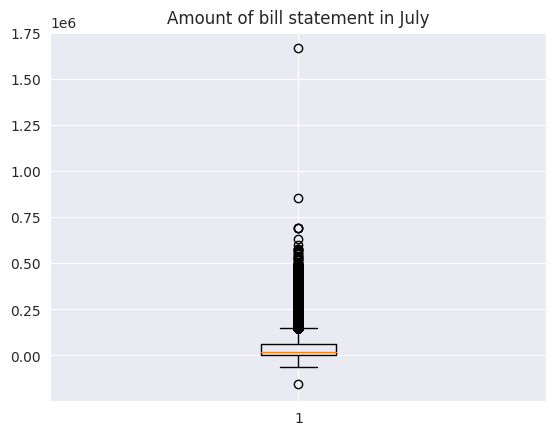

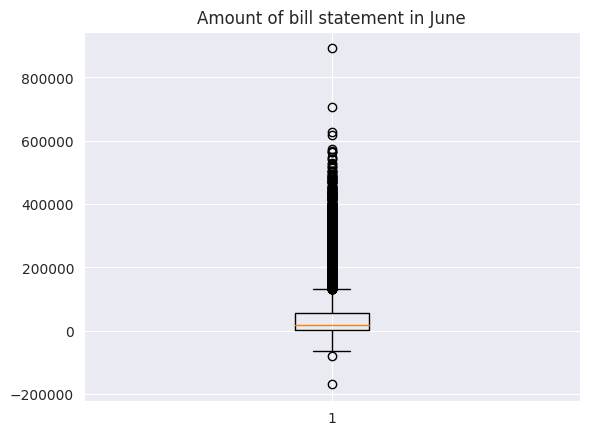

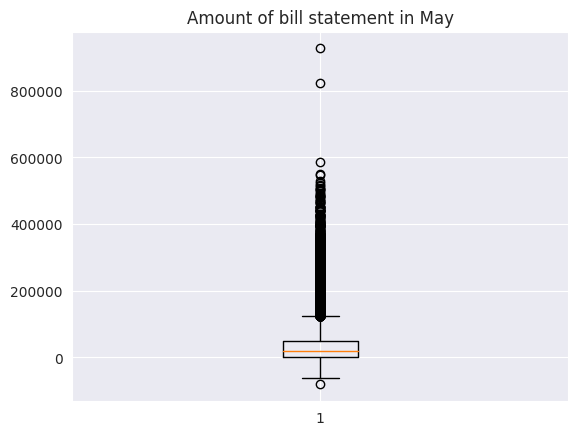

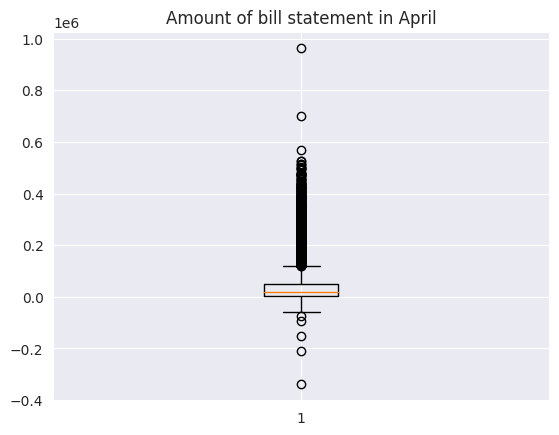

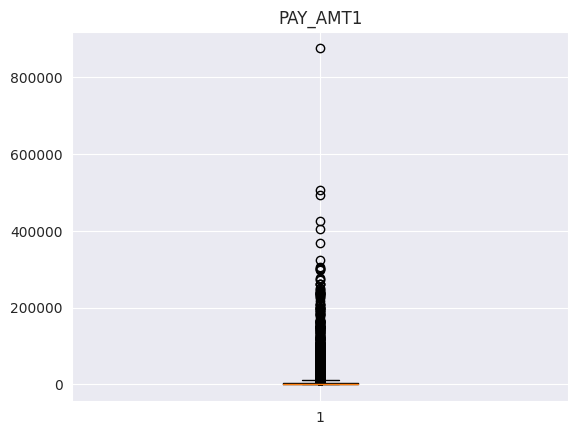

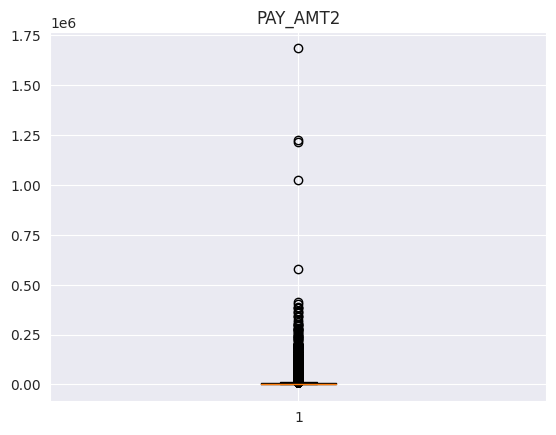

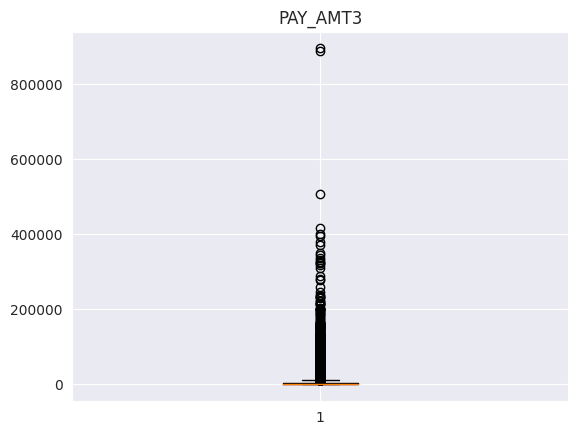

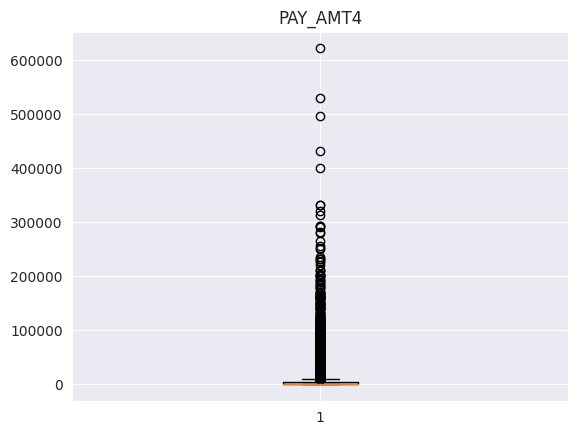

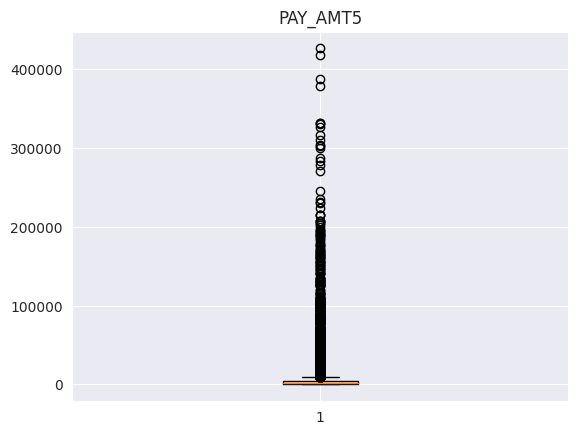

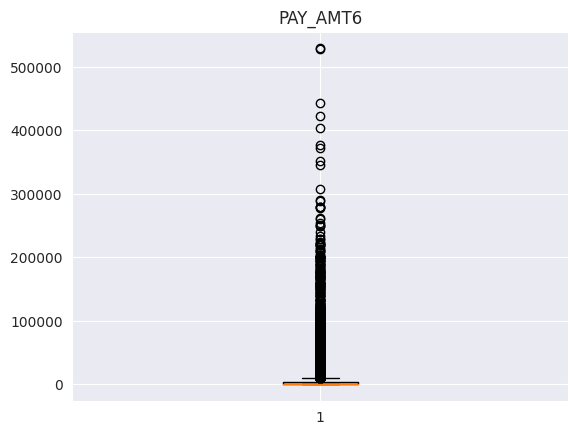

In [ ]:
##finding outlier points
for i in ['LIMIT_BAL','Payment Status For September','Payment Status For August','Payment Status For May','Payment Status For July','Payment Status For June','Payment Status For April','Amount of bill statement in September','Amount of bill statement in August','Amount of bill statement in July','Amount of bill statement in June','Amount of bill statement in May','Amount of bill statement in April','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [ ]:
##REMOVING OUTLIERS
#Capping Method

In [ ]:
def iqr_capping(data,variables):
  
  q1=data[variables].quantile(0.25)
  q3=data[variables].quantile(0.75)
  iqr=q3-q1
  upper_whisker=q3+(1.5*iqr)
  lower_whisker=q1-(1.5*iqr)
  return lower_whisker,upper_whisker

In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'LIMIT_BAL')
print('LIMIT_BAL = ',lower_applicant)
print('LIMIT_BAL= ',upper_applicant)
data['LIMIT_BAL']=np.where(data['LIMIT_BAL']>upper_applicant,upper_applicant,
                    np.where(data['LIMIT_BAL']<lower_applicant,lower_applicant,data['LIMIT_BAL']))

LIMIT_BAL =  -235000.0
LIMIT_BAL=  525000.0


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'PAY_AMT1')
print('PAY_AMT1 = ',lower_applicant)
print('PAY_AMT1= ',upper_applicant)
data['PAY_AMT1']=np.where(data['PAY_AMT1']>upper_applicant,upper_applicant,
                    np.where(data['PAY_AMT1']<lower_applicant,lower_applicant,data['PAY_AMT1']))

PAY_AMT1 =  -5009.0
PAY_AMT1=  11015.0


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Payment Status For September')
print('Payment Status For September = ',lower_applicant)
print('Payment Status For September= ',upper_applicant)
data['Payment Status For September']=np.where(data['Payment Status For September']>upper_applicant,upper_applicant,
                    np.where(data['Payment Status For September']<lower_applicant,lower_applicant,data['Payment Status For September']))

Payment Status For September =  -2.5
Payment Status For September=  1.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Payment Status For August')
print('Payment Status For August = ',lower_applicant)
print('Payment Status For August= ',upper_applicant)
data['Payment Status For August']=np.where(data['Payment Status For August']>upper_applicant,upper_applicant,
                    np.where(data['Payment Status For August']<lower_applicant,lower_applicant,data['Payment Status For August']))

Payment Status For August =  -2.5
Payment Status For August=  1.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Payment Status For May')
print('Payment Status For May = ',lower_applicant)
print('Payment Status For May= ',upper_applicant)
data['Payment Status For May']=np.where(data['Payment Status For May']>upper_applicant,upper_applicant,
                    np.where(data['Payment Status For May']<lower_applicant,lower_applicant,data['Payment Status For May']))

Payment Status For May =  -2.5
Payment Status For May=  1.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Payment Status For July')
print('Payment Status For July = ',lower_applicant)
print('Payment Status For July= ',upper_applicant)
data['Payment Status For July']=np.where(data['Payment Status For July']>upper_applicant,upper_applicant,
                    np.where(data['Payment Status For July']<lower_applicant,lower_applicant,data['Payment Status For July']))

Payment Status For July =  -2.5
Payment Status For July=  1.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Payment Status For June')
print('Payment Status For June = ',lower_applicant)
print('Payment Status For June= ',upper_applicant)
data['Payment Status For June']=np.where(data['Payment Status For June']>upper_applicant,upper_applicant,
                    np.where(data['Payment Status For June']<lower_applicant,lower_applicant,data['Payment Status For June']))

Payment Status For June =  -2.5
Payment Status For June=  1.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Payment Status For April')
print('Payment Status For April = ',lower_applicant)
print('Payment Status For April= ',upper_applicant)
data['Payment Status For April']=np.where(data['Payment Status For April']>upper_applicant,upper_applicant,
                    np.where(data['Payment Status For April']<lower_applicant,lower_applicant,data['Payment Status For April']))

Payment Status For April =  -2.5
Payment Status For April=  1.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Amount of bill statement in September')
print('Amount of bill statement in September = ',lower_applicant)
print('Amount of bill statement in September= ',upper_applicant)
data['Amount of bill statement in September']=np.where(data['Amount of bill statement in September']>upper_applicant,upper_applicant,
                    np.where(data['Amount of bill statement in September']<lower_applicant,lower_applicant,data['Amount of bill statement in September']))

Amount of bill statement in September =  -91739.625
Amount of bill statement in September=  162389.375


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Amount of bill statement in August')
print('Amount of bill statement in August = ',lower_applicant)
print('Amount of bill statement in August= ',upper_applicant)
data['Amount of bill statement in August']=np.where(data['Amount of bill statement in August']>upper_applicant,upper_applicant,
                    np.where(data['Amount of bill statement in August']<lower_applicant,lower_applicant,data['Amount of bill statement in August']))

Amount of bill statement in August =  -88547.5
Amount of bill statement in August=  155538.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Amount of bill statement in July')
print('Amount of bill statement in July = ',lower_applicant)
print('Amount of bill statement in July= ',upper_applicant)
data['Amount of bill statement in July']=np.where(data['Amount of bill statement in July']>upper_applicant,upper_applicant,
                    np.where(data['Amount of bill statement in July']<lower_applicant,lower_applicant,data['Amount of bill statement in July']))

Amount of bill statement in July =  -83581.5
Amount of bill statement in July=  146412.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Amount of bill statement in June')
print('Amount of bill statement in June = ',lower_applicant)
print('Amount of bill statement in June= ',upper_applicant)
data['Amount of bill statement in June']=np.where(data['Amount of bill statement in June']>upper_applicant,upper_applicant,
                    np.where(data['Amount of bill statement in June']<lower_applicant,lower_applicant,data['Amount of bill statement in June']))

Amount of bill statement in June =  -75942.125
Amount of bill statement in June=  132774.875


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Amount of bill statement in May')
print('Amount of bill statement in May = ',lower_applicant)
print('Amount of bill statement in May= ',upper_applicant)
data['Amount of bill statement in May']=np.where(data['Amount of bill statement in May']>upper_applicant,upper_applicant,
                    np.where(data['Amount of bill statement in May']<lower_applicant,lower_applicant,data['Amount of bill statement in May']))

Amount of bill statement in May =  -70878.25
Amount of bill statement in May=  122831.75


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'Amount of bill statement in April')
print('Amount of bill statement in April = ',lower_applicant)
print('Amount of bill statement in April= ',upper_applicant)
data['Amount of bill statement in April']=np.where(data['Amount of bill statement in April']>upper_applicant,upper_applicant,
                    np.where(data['Amount of bill statement in April']<lower_applicant,lower_applicant,data['Amount of bill statement in April']))

Amount of bill statement in April =  -70657.375
Amount of bill statement in April=  121111.625


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'PAY_AMT1')
print('PAY_AMT1 = ',lower_applicant)
print('PAY_AMT1= ',upper_applicant)
data['PAY_AMT1']=np.where(data['PAY_AMT1']>upper_applicant,upper_applicant,
                    np.where(data['PAY_AMT1']<lower_applicant,lower_applicant,data['PAY_AMT1']))

PAY_AMT1 =  -5009.0
PAY_AMT1=  11015.0


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'PAY_AMT2')
print('PAY_AMT2 = ',lower_applicant)
print('PAY_AMT2= ',upper_applicant)
data['PAY_AMT2']=np.where(data['PAY_AMT2']>upper_applicant,upper_applicant,
                    np.where(data['PAY_AMT2']<lower_applicant,lower_applicant,data['PAY_AMT2']))

PAY_AMT2 =  -5417.5
PAY_AMT2=  11250.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'PAY_AMT3')
print('PAY_AMT3 = ',lower_applicant)
print('PAY_AMT3= ',upper_applicant)
data['PAY_AMT3']=np.where(data['PAY_AMT3']>upper_applicant,upper_applicant,
                    np.where(data['PAY_AMT3']<lower_applicant,lower_applicant,data['PAY_AMT3']))

PAY_AMT3 =  -5782.5
PAY_AMT3=  10677.5


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'PAY_AMT4')
print('PAY_AMT4 = ',lower_applicant)
print('PAY_AMT4= ',upper_applicant)
data['PAY_AMT4']=np.where(data['PAY_AMT4']>upper_applicant,upper_applicant,
                    np.where(data['PAY_AMT4']<lower_applicant,lower_applicant,data['PAY_AMT4']))

PAY_AMT4 =  -5279.875
PAY_AMT4=  9589.125


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'PAY_AMT5')
print('PAY_AMT5 = ',lower_applicant)
print('PAY_AMT5= ',upper_applicant)
data['PAY_AMT5']=np.where(data['PAY_AMT5']>upper_applicant,upper_applicant,
                    np.where(data['PAY_AMT5']<lower_applicant,lower_applicant,data['PAY_AMT5']))

PAY_AMT5 =  -5416.0
PAY_AMT5=  9700.0


In [ ]:
lower_applicant,upper_applicant=iqr_capping(data,'PAY_AMT6')
print('PAY_AMT6 = ',lower_applicant)
print('PAY_AMT6= ',upper_applicant)
data['PAY_AMT6']=np.where(data['PAY_AMT6']>upper_applicant,upper_applicant,
                    np.where(data['PAY_AMT6']<lower_applicant,lower_applicant,data['PAY_AMT6']))

PAY_AMT6 =  -5705.625
PAY_AMT6=  9823.375


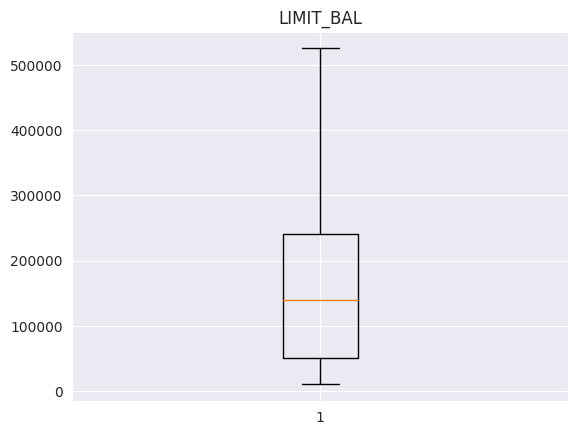

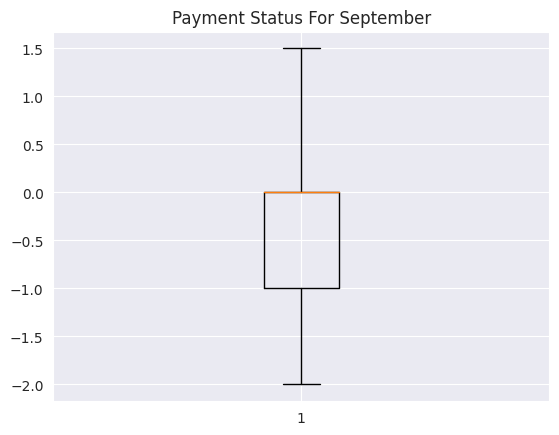

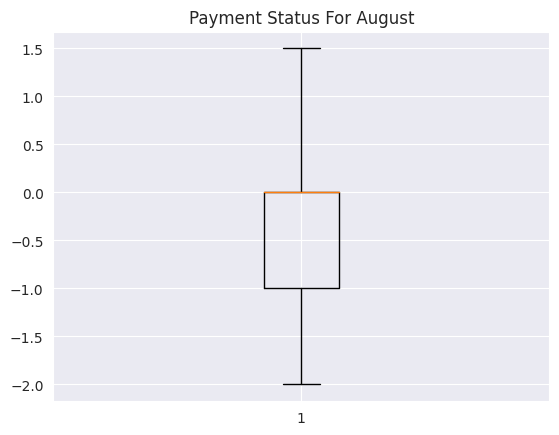

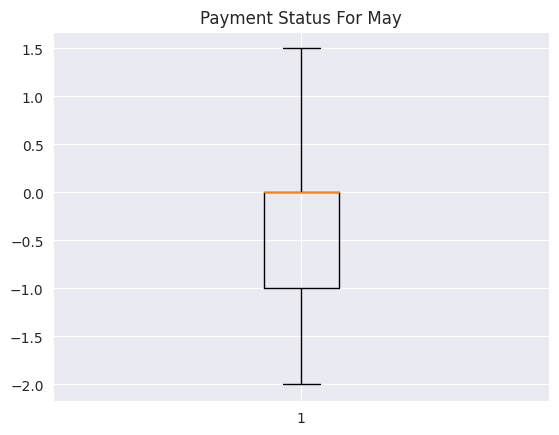

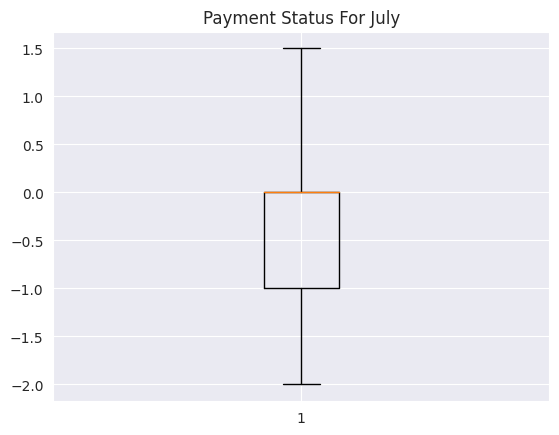

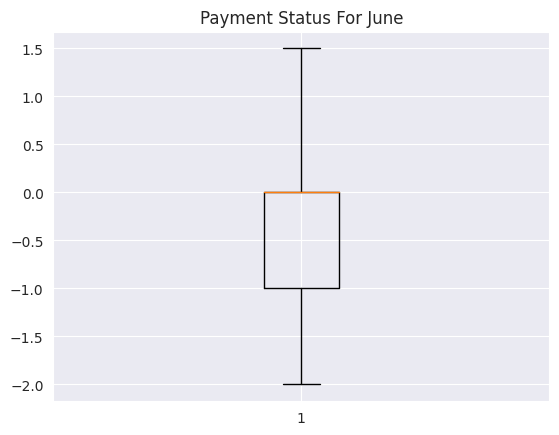

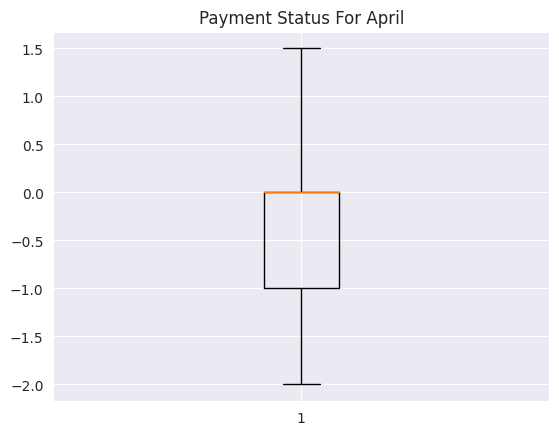

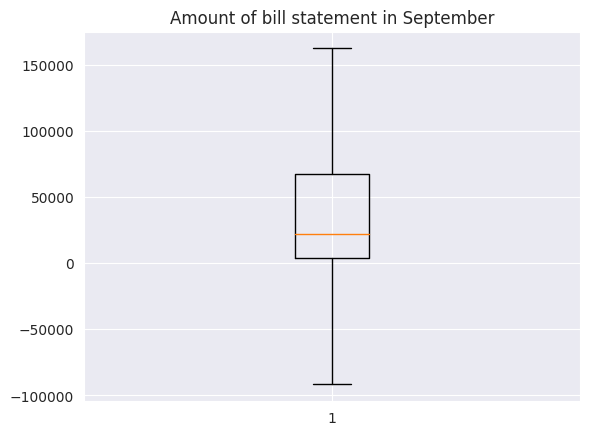

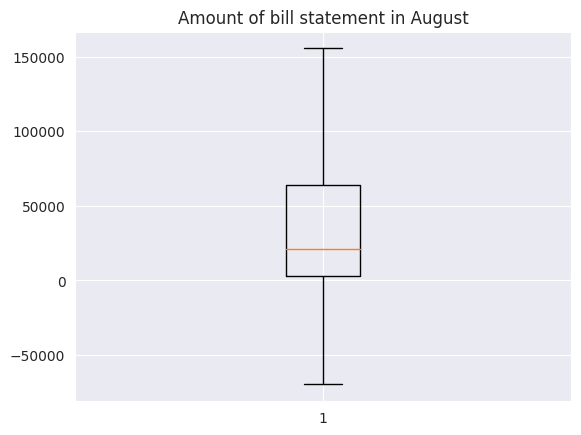

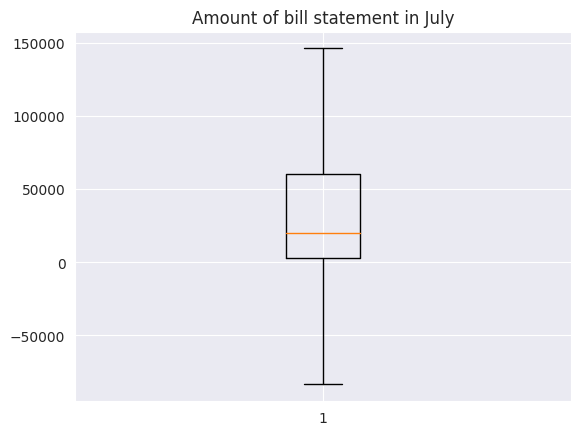

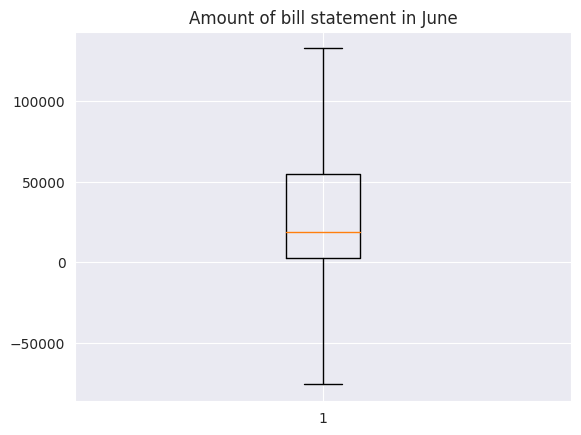

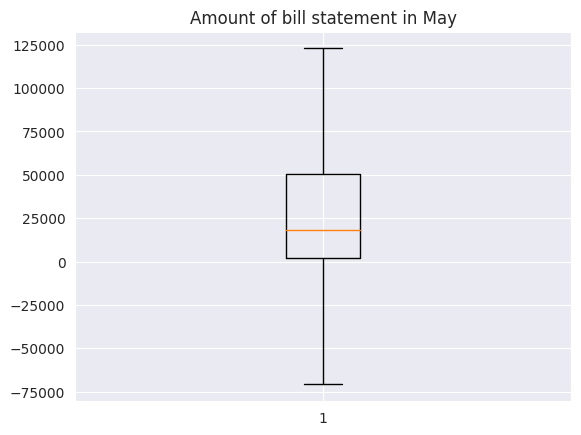

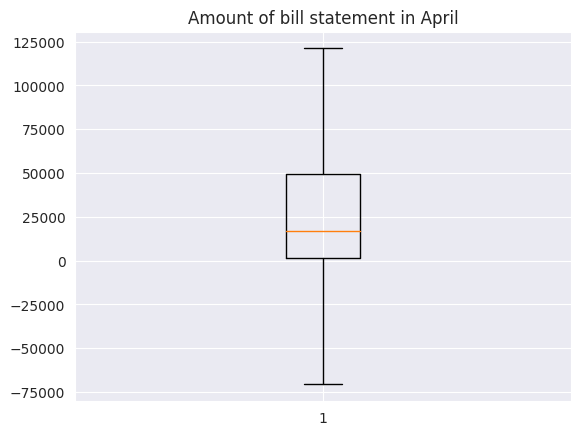

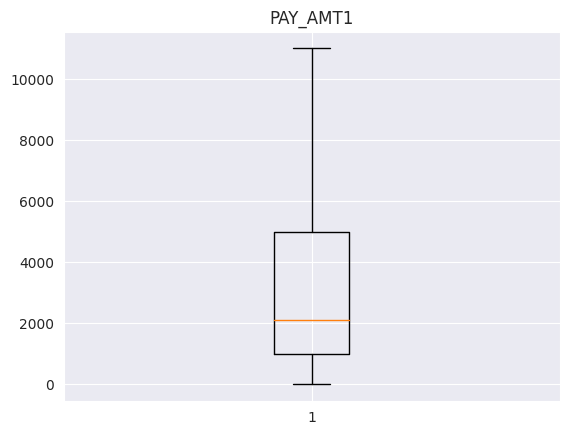

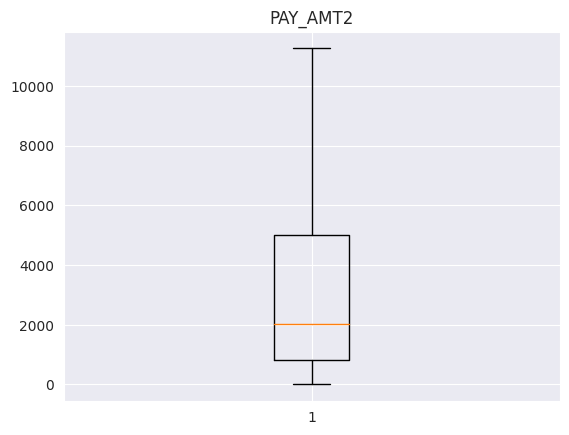

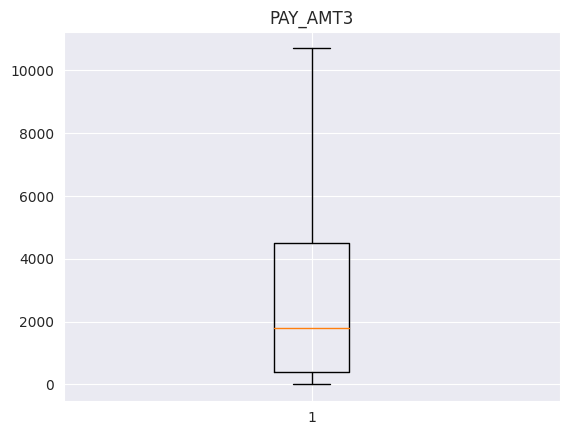

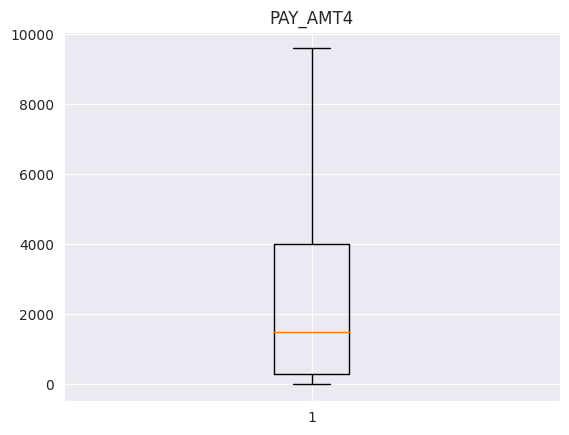

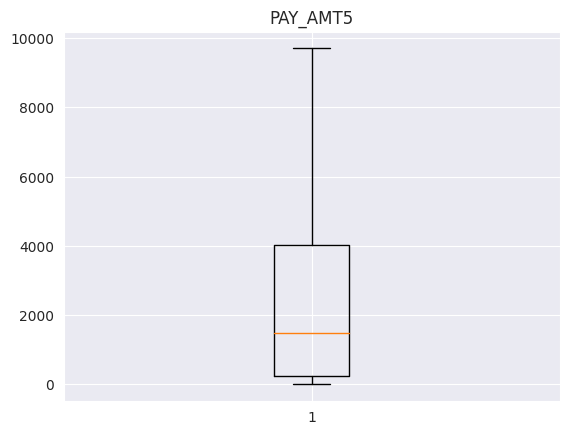

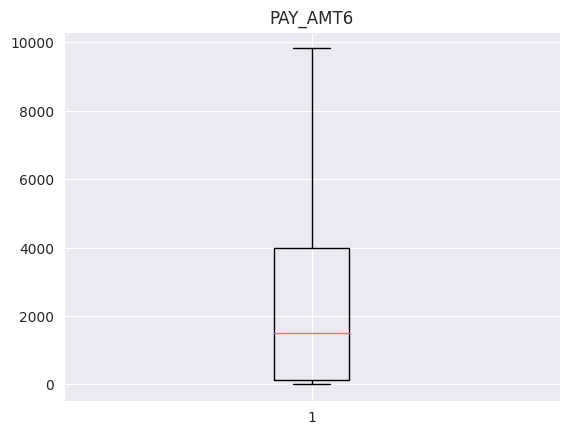

In [ ]:
for i in ['LIMIT_BAL','Payment Status For September','Payment Status For August','Payment Status For May','Payment Status For July','Payment Status For June','Payment Status For April','Amount of bill statement in September','Amount of bill statement in August','Amount of bill statement in July','Amount of bill statement in June','Amount of bill statement in May','Amount of bill statement in April','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

#ENCODING

In [ ]:
#Label Encoding

In [ ]:
data.dtypes

LIMIT_BAL                                float64
SEX                                       object
EDUCATION                                 object
MARRIAGE                                  object
AGE                                        int64
Payment Status For September             float64
Payment Status For August                float64
Payment Status For May                   float64
Payment Status For July                  float64
Payment Status For June                  float64
Payment Status For April                 float64
Amount of bill statement in September    float64
Amount of bill statement in August       float64
Amount of bill statement in July         float64
Amount of bill statement in June         float64
Amount of bill statement in May          float64
Amount of bill statement in April        float64
PAY_AMT1                                 float64
PAY_AMT2                                 float64
PAY_AMT3                                 float64
PAY_AMT4            

In [ ]:
data.SEX.nunique()

2

In [ ]:
data['EDUCATION'].nunique()

5

In [ ]:
data.MARRIAGE.nunique()

4

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in data.columns:
  if data[col].dtype=='object':
    data[col]=label_encoder.fit_transform(data[col].astype(str))

In [ ]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Payment Status For September,Payment Status For August,Payment Status For May,Payment Status For July,Payment Status For June,...,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,0,3,1,24,1.5,1.5,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,3,26,-1.0,1.5,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,3,34,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,1,37,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,1,57,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.dtypes

LIMIT_BAL                                float64
SEX                                        int64
EDUCATION                                  int64
MARRIAGE                                   int64
AGE                                        int64
Payment Status For September             float64
Payment Status For August                float64
Payment Status For May                   float64
Payment Status For July                  float64
Payment Status For June                  float64
Payment Status For April                 float64
Amount of bill statement in September    float64
Amount of bill statement in August       float64
Amount of bill statement in July         float64
Amount of bill statement in June         float64
Amount of bill statement in May          float64
Amount of bill statement in April        float64
PAY_AMT1                                 float64
PAY_AMT2                                 float64
PAY_AMT3                                 float64
PAY_AMT4            

<Axes: >

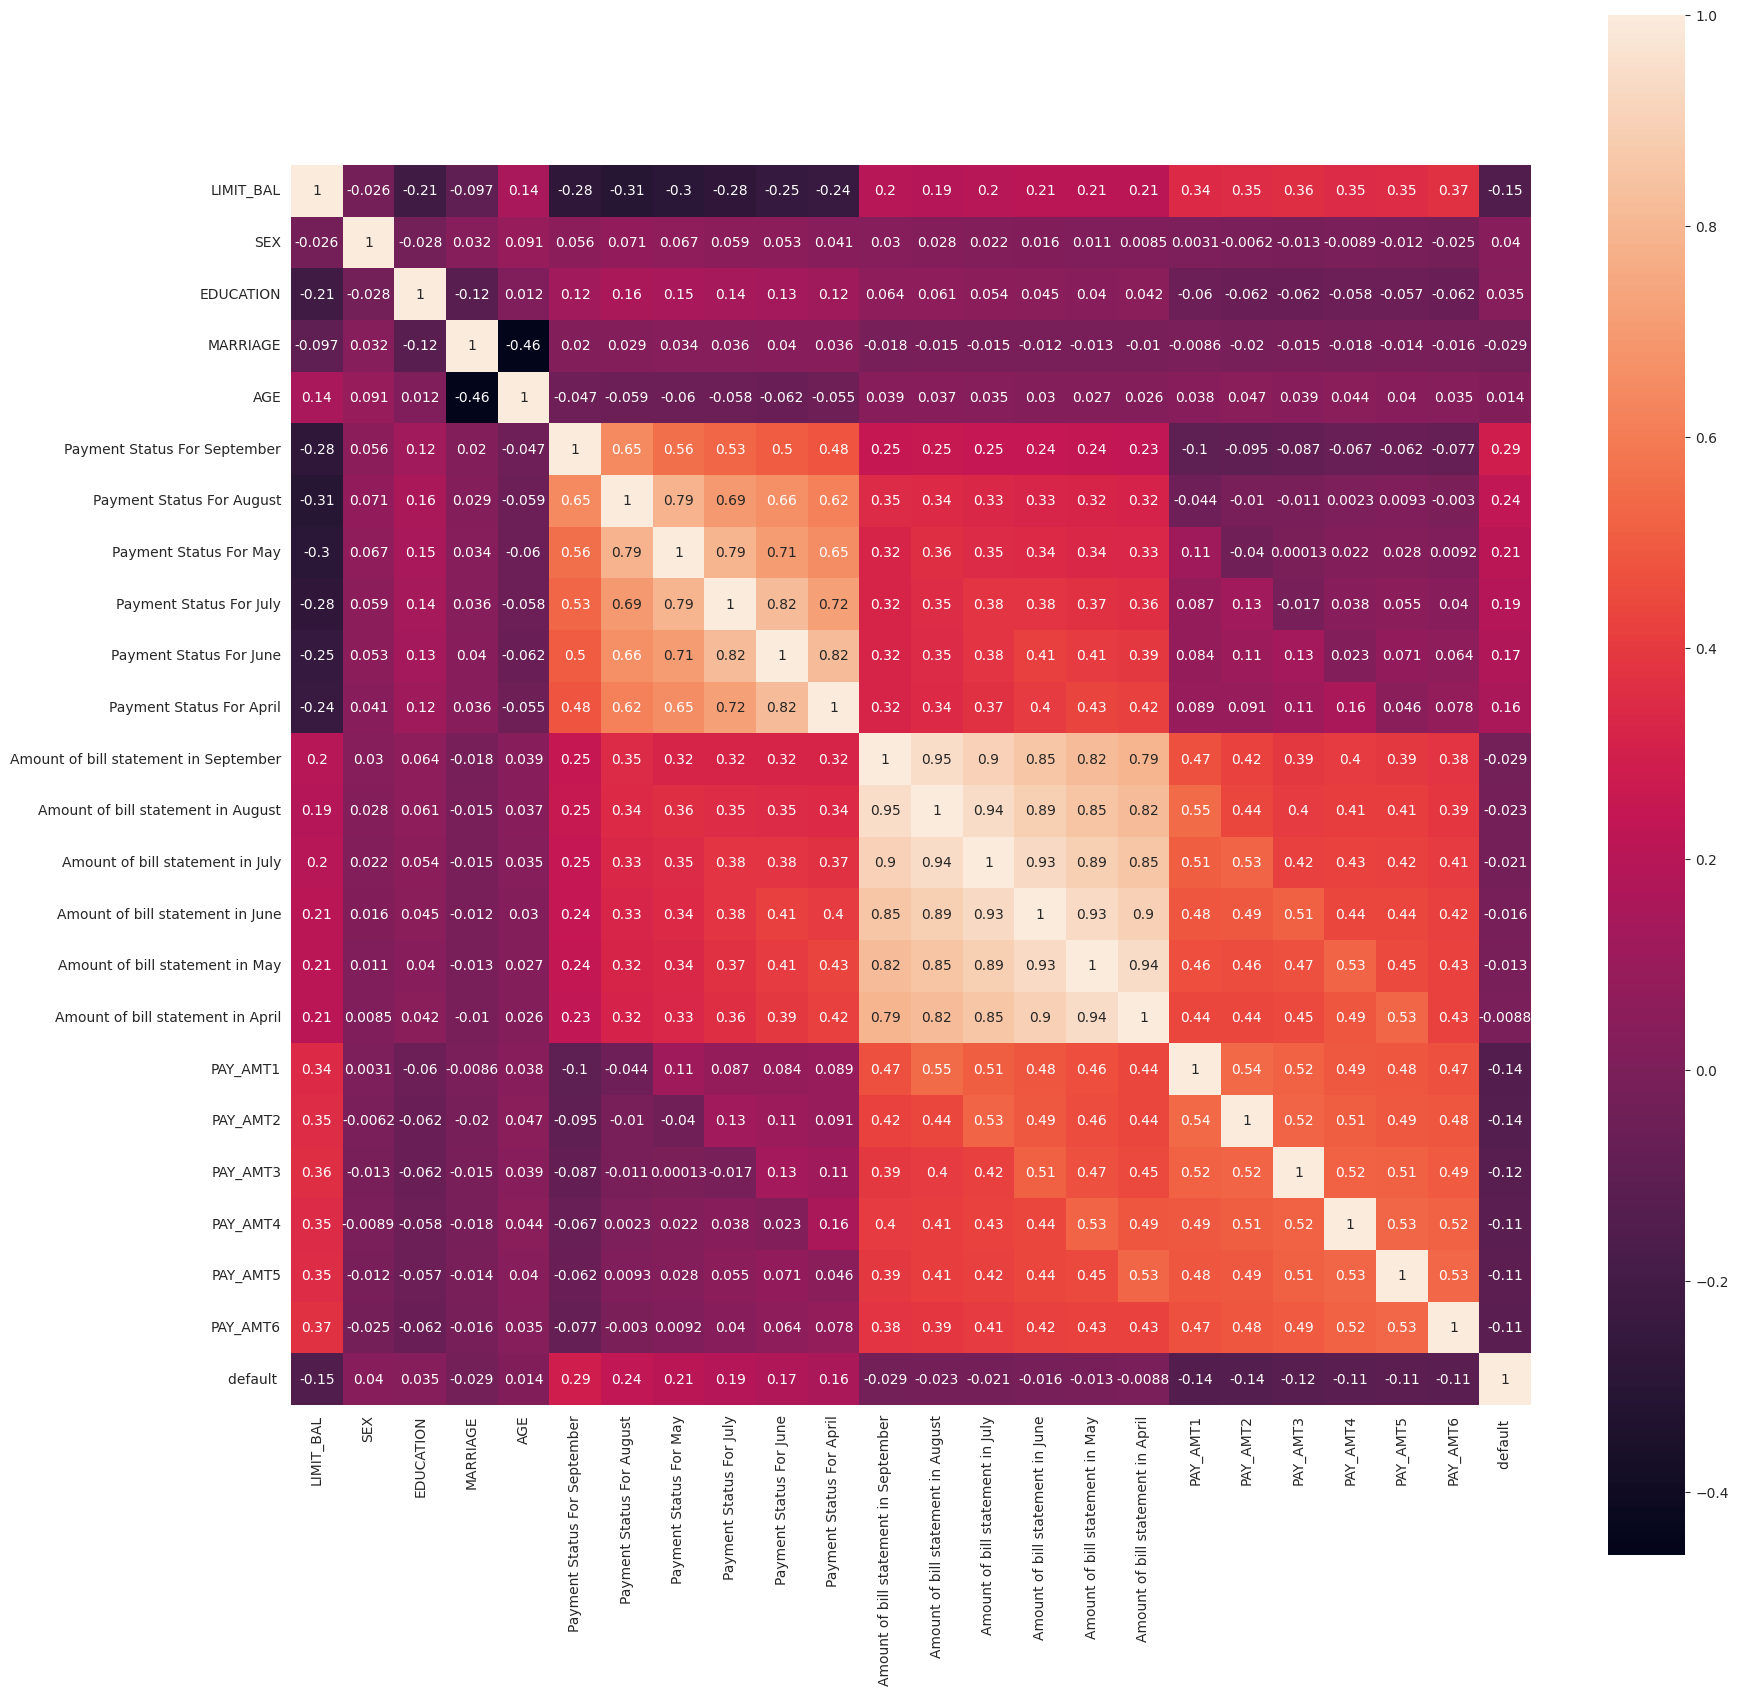

In [ ]:
corr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=None, square=True, annot=True)

In [ ]:
## 1] MINMAX SCALING

In [ ]:
x1=data.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','default '],axis=1)
x1.describe()

,LIMIT_BAL,Payment Status For September,Payment Status For August,Payment Status For May,Payment Status For July,Payment Status For June,Payment Status For April,Amount of bill statement in September,Amount of bill statement in August,Amount of bill statement in July,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,166967.489333,-0.094033,-0.232367,-0.259683,-0.303967,-0.339300,-0.363717,44293.480167,42394.577817,40125.597017,36551.073642,33754.151258,32595.088604,3496.730800,3422.306967,3035.817900,2718.296075,2731.547167,2714.437875
std,128013.394323,0.951983,0.991794,0.995493,0.969589,0.947772,0.970910,51294.870270,49266.963176,46699.554039,42751.481350,39896.030557,39367.735129,3492.742781,3532.819886,3355.632738,3073.301491,3094.091228,3131.180741
min,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-91739.625000,-69777.000000,-83581.500000,-75942.125000,-70878.250000,-70657.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000
max,525000.000000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,162389.375000,155538.500000,146412.500000,132774.875000,122831.750000,121111.625000,11015.000000,11250.500000,10677.500000,9589.125000,9700.000000,9823.375000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
x1=min_max_scaler.fit_transform(x1)
x1

array([[0.01941748, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21359223, 0.28571429, 1.        , ..., 0.1042848 , 0.        ,
        0.20359601],
       [0.15533981, 0.57142857, 0.57142857, ..., 0.1042848 , 0.10309278,
        0.50899004],
       ...,
       [0.03883495, 1.        , 1.        , ..., 0.43799617, 0.20618557,
        0.31557382],
       [0.13592233, 0.85714286, 0.28571429, ..., 0.20085253, 1.        ,
        0.18364361],
       [0.0776699 , 0.57142857, 0.57142857, ..., 0.1042848 , 0.10309278,
        0.10179801]])

In [ ]:
x1=pd.DataFrame(x1,columns=['LIMIT_BAL','Payment Status For September', 'Payment Status For August',
       'Payment Status For May', 'Payment Status For July',
       'Payment Status For June', 'Payment Status For April',
       'Amount of bill statement in September',
       'Amount of bill statement in August',
       'Amount of bill statement in July', 'Amount of bill statement in June',
       'Amount of bill statement in May', 'Amount of bill statement in April',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [ ]:
x1.describe()

,LIMIT_BAL,Payment Status For September,Payment Status For August,Payment Status For May,Payment Status For July,Payment Status For June,Payment Status For April,Amount of bill statement in September,Amount of bill statement in August,Amount of bill statement in July,Amount of bill statement in June,Amount of bill statement in May,Amount of bill statement in April,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.304791,0.544562,0.505038,0.497233,0.484581,0.474486,0.467510,0.535292,0.497842,0.537871,0.538975,0.540150,0.538421,0.317452,0.304192,0.284319,0.283477,0.281603,0.276324
std,0.248570,0.271995,0.283370,0.284427,0.277025,0.270792,0.277403,0.201846,0.218658,0.203047,0.204830,0.205958,0.205287,0.317090,0.314014,0.314271,0.320499,0.318978,0.318748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.077670,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,0.375000,0.322933,0.375000,0.375000,0.375000,0.375000,0.090785,0.074041,0.036525,0.030868,0.026031,0.011987
50%,0.252427,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.449068,0.403776,0.450751,0.455134,0.459361,0.457469,0.190649,0.178570,0.168579,0.156427,0.154639,0.152697
75%,0.446602,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.625000,0.593760,0.625000,0.625000,0.625000,0.625000,0.454471,0.444425,0.421915,0.418521,0.415619,0.407192
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x2=data.drop(['LIMIT_BAL','Payment Status For September', 'Payment Status For August',
       'Payment Status For May', 'Payment Status For July',
       'Payment Status For June', 'Payment Status For April',
       'Amount of bill statement in September',
       'Amount of bill statement in August',
       'Amount of bill statement in July', 'Amount of bill statement in June',
       'Amount of bill statement in May', 'Amount of bill statement in April',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1)
x2

,SEX,EDUCATION,MARRIAGE,AGE,default
0,0,3,1,24,1
1,0,3,3,26,1
2,0,3,3,34,0
3,0,3,1,37,0
4,1,3,1,57,0
...,...,...,...,...,...
29995,1,2,1,39,0
29996,1,2,3,43,0
29997,1,3,3,37,1
29998,1,2,1,41,1


In [ ]:
data_M=pd.concat([x1,x2],axis=1)

In [ ]:
data_M

,LIMIT_BAL,Payment Status For September,Payment Status For August,Payment Status For May,Payment Status For July,Payment Status For June,Payment Status For April,Amount of bill statement in September,Amount of bill statement in August,Amount of bill statement in July,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,AGE,default
0,0.019417,1.000000,1.000000,0.285714,0.285714,0.000000,0.000000,0.376394,0.323453,0.366403,...,0.061242,0.000000,0.000000,0.000000,0.000000,0,3,1,24,1
1,0.213592,0.285714,1.000000,0.571429,0.571429,0.571429,1.000000,0.371550,0.317342,0.375068,...,0.088885,0.093655,0.104285,0.000000,0.203596,0,3,3,26,1
2,0.155340,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.476052,0.371941,0.422361,...,0.133327,0.093655,0.104285,0.103093,0.508990,0,3,3,34,0
3,0.077670,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.545902,0.523754,0.577722,...,0.179459,0.112386,0.114713,0.110206,0.101798,0,3,1,37,0
4,0.077670,0.285714,0.571429,0.285714,0.571429,0.571429,0.571429,0.394904,0.334850,0.519216,...,1.000000,0.936549,0.938563,0.071031,0.069121,1,3,1,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.407767,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,1.000000,1.000000,1.000000,...,1.000000,0.468555,0.317756,0.515464,0.101798,1,2,1,39,0
29996,0.271845,0.285714,0.285714,0.285714,0.285714,0.571429,0.571429,0.367619,0.317799,0.378634,...,0.313408,0.842707,0.013453,0.000000,0.000000,1,2,3,43,0
29997,0.038835,1.000000,1.000000,1.000000,0.285714,0.571429,0.571429,0.375025,0.324580,0.375399,...,0.000000,1.000000,0.437996,0.206186,0.315574,1,3,3,37,1
29998,0.135922,0.857143,0.285714,0.571429,0.571429,0.571429,0.285714,0.354523,0.657549,0.695172,...,0.303009,0.110325,0.200853,1.000000,0.183644,1,2,1,41,1


In [ ]:
y=data_M['default ']
x=data_M.drop(['default '],axis=1)

In [ ]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
x_train.shape

(22500, 23)

In [ ]:
y_train.shape

(22500,)

#CLASSIFICATION MODELS

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))

Accuracy is 0.8036
Precision is 0.6300675675675675
Recall is 0.2292562999385372
f1 score is 0.3361874718341595


In [ ]:
cm=confusion_matrix(y_test,y_pred)

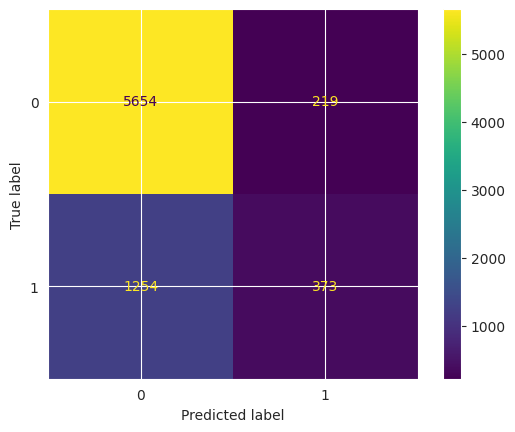

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

k-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.7672,
 0.7852,
 0.7821333333333333,
 0.7882666666666667,
 0.7884,
 0.7917333333333333,
 0.7917333333333333,
 0.7918666666666667,
 0.7925333333333333,
 0.7913333333333333,
 0.7930666666666667,
 0.7916]

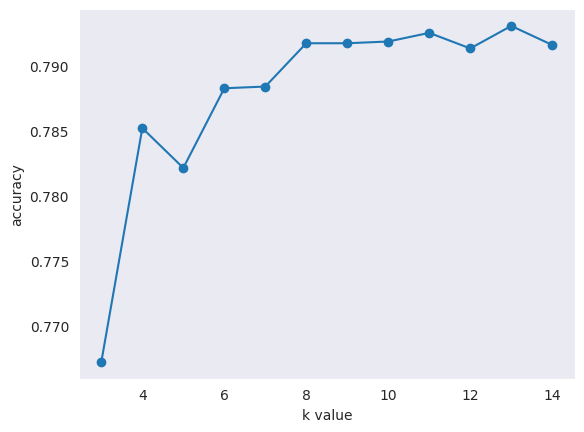

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

Accuracy is 0.7821333333333333
Precision is 0.4950354609929078
Recall is 0.21450522433927474
f1 score is 0.29931389365351635


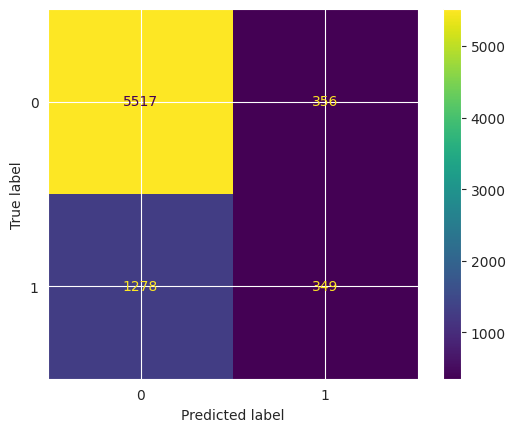

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svmclf.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))

Accuracy is 0.7830666666666667
Precision is 0.0
Recall is 0.0
f1 score is 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



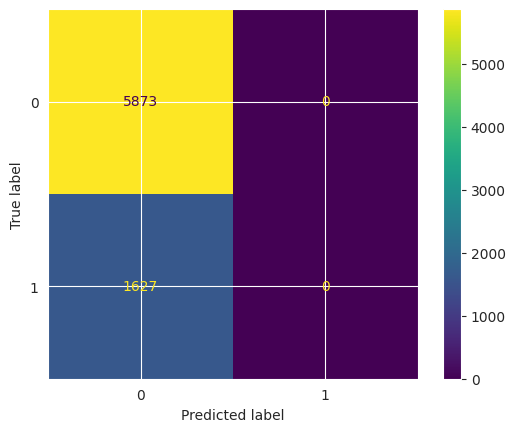

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))


Accuracy is 0.7253333333333334
Precision is 0.38084755090809025
Recall is 0.4253226797787339
f1 score is 0.40185830429732866


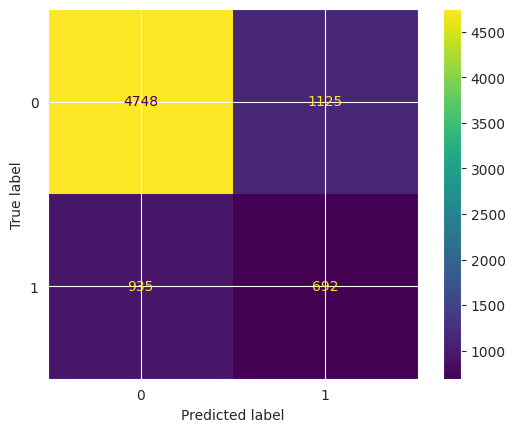

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))

Accuracy is 0.8161333333333334
Precision is 0.6353711790393013
Recall is 0.35771358328211433
f1 score is 0.45772709398348405


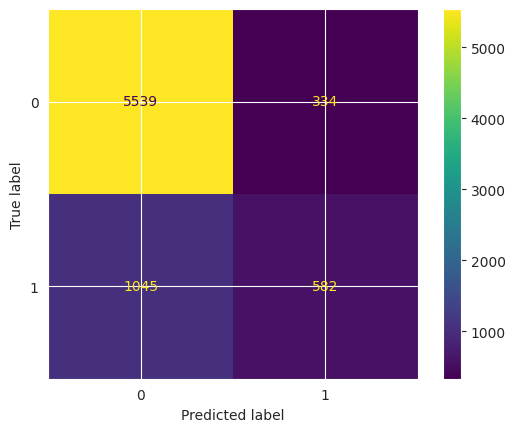

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Hyper Parameter tuning

In [ ]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf1.fit(x_train,y_train)
y_pred=rf_clf1.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred))
print('Recall is',recall_score(y_test,y_pred))
print('f1 score is',f1_score(y_test,y_pred))

Accuracy is 0.8070666666666667
Precision is 0.6541095890410958
Recall is 0.2347879532882606
f1 score is 0.34554500226142015


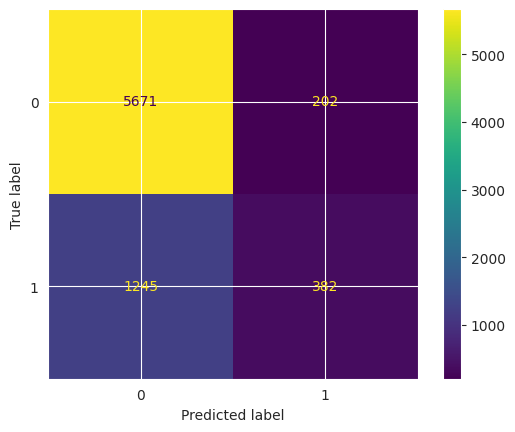

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
## 2]STANDARD SCALING

In [ ]:
Y=data['default ']
X=data.drop(['default '],axis=1)

In [ ]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_pred=logit_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred))
print('Recall is',recall_score(Y_test,Y_pred))
print('f1 score is',f1_score(Y_test,Y_pred))

Accuracy is 0.8049333333333333
Precision is 0.6331168831168831
Recall is 0.23970497848801475
f1 score is 0.3477485510477039


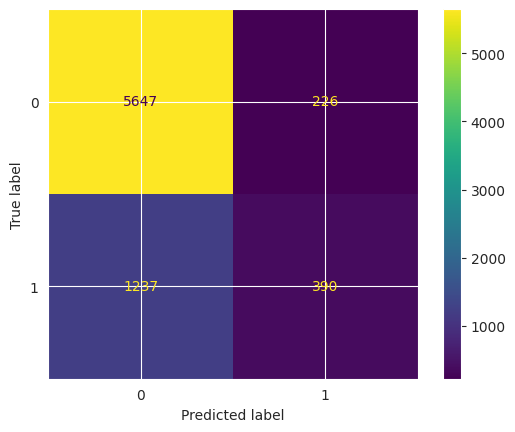

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

k-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k1=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(X_train,Y_train)
    Y_pred=classifier.predict(X_test)
    acc=accuracy_score(Y_test,Y_pred)
    metric_k1.append(acc)

metric_k1

[0.7764,
 0.7928,
 0.7888,
 0.7972,
 0.7964,
 0.8022666666666667,
 0.8029333333333334,
 0.8030666666666667,
 0.8046666666666666,
 0.8049333333333333,
 0.8049333333333333,
 0.8037333333333333]

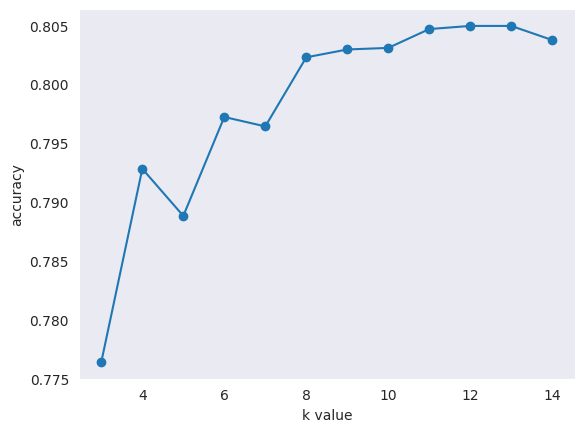

In [ ]:
plt.plot(neighbors,metric_k1,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred))
print('Recall is',recall_score(Y_test,Y_pred))
print('f1 score is',f1_score(Y_test,Y_pred))

Accuracy is 0.7888
Precision is 0.5212660731948566
Recall is 0.3239090350338045
f1 score is 0.3995451099317665


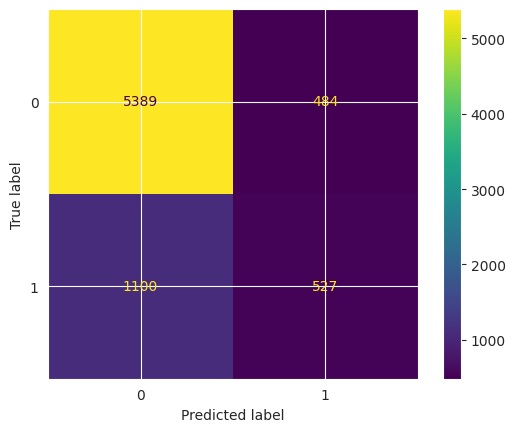

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
svmclf.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
Y_pred=svmclf.predict(X_test)

In [ ]:
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred))
print('Recall is',recall_score(Y_test,Y_pred))
print('f1 score is',f1_score(Y_test,Y_pred))

Accuracy is 0.7830666666666667
Precision is 0.0
Recall is 0.0
f1 score is 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



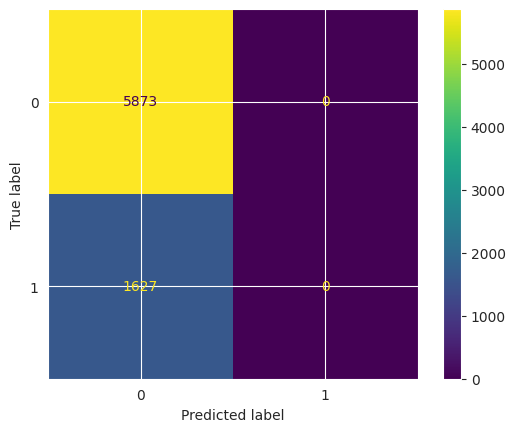

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,Y_train)
Y_pred=dt_clf.predict(X_test)

In [ ]:
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred))
print('Recall is',recall_score(Y_test,Y_pred))
print('f1 score is',f1_score(Y_test,Y_pred))

Accuracy is 0.7096
Precision is 0.3549236440231701
Recall is 0.414259373079287
f1 score is 0.3823028927963698


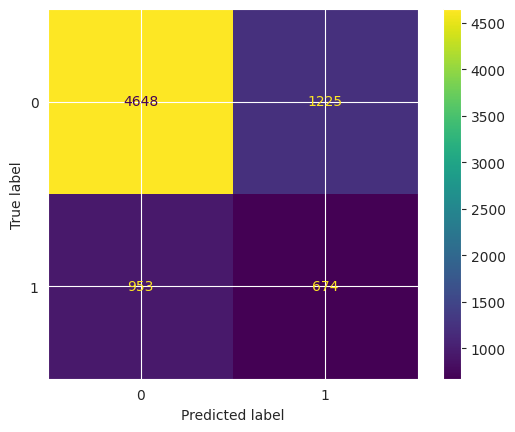

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,Y_train)
Y_pred=rf_clf.predict(X_test)

In [ ]:
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred))
print('Recall is',recall_score(Y_test,Y_pred))
print('f1 score is',f1_score(Y_test,Y_pred))

Accuracy is 0.8152
Precision is 0.6346368715083799
Recall is 0.34910878918254457
f1 score is 0.45043616177636797


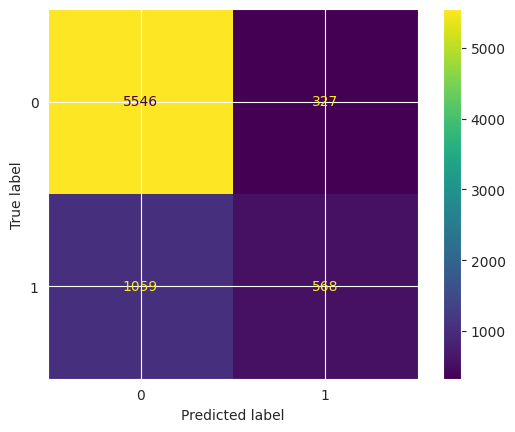

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Hyperparameter tuning

In [ ]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf1.fit(X_train,Y_train)
Y_pred=rf_clf1.predict(X_test)

In [ ]:
print('Accuracy is',accuracy_score(Y_test,Y_pred))
print('Precision is',precision_score(Y_test,Y_pred))
print('Recall is',recall_score(Y_test,Y_pred))
print('f1 score is',f1_score(Y_test,Y_pred))

Accuracy is 0.8078666666666666
Precision is 0.655
Recall is 0.24154886293792255
f1 score is 0.3529411764705882


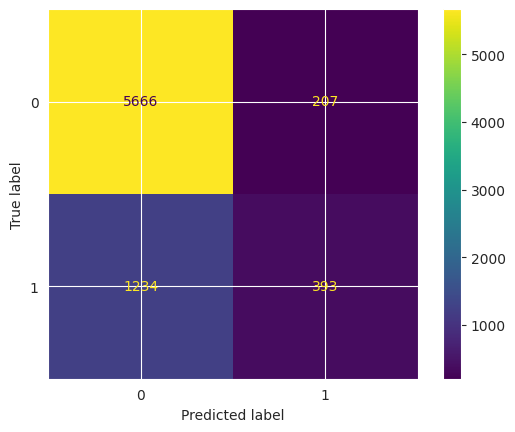

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()